In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
hourly = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\hourly_station35.csv")
hourly.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude
0,2013-08-05,16,35,11,Streeter Dr & Grand Ave,41.892278,-87.612043
1,2013-08-05,17,35,9,Streeter Dr & Grand Ave,41.892278,-87.612043
2,2013-08-05,18,35,6,Streeter Dr & Grand Ave,41.892278,-87.612043
3,2013-08-05,19,35,12,Streeter Dr & Grand Ave,41.892278,-87.612043
4,2013-08-05,20,35,4,Streeter Dr & Grand Ave,41.892278,-87.612043


In [7]:
#any null value?
hourly.isnull().sum()
hourly.startday =  pd.to_datetime(hourly.startday, errors="coerce")
hourly.dtypes

startday                  datetime64[ns]
starthour                          int64
from_station_id                    int64
num_trips                          int64
from_station_name                 object
from_station_latitude            float64
from_station_longitude           float64
dtype: object

In [8]:
#feature engineering
#Dervice weekday and weekend
#convert column data into appropriate
dateTimeIndex = pd.DatetimeIndex(hourly['startday'])
hourly["day"] = dateTimeIndex.dayofweek
hourly["month"] = dateTimeIndex.month
hourly['year']= dateTimeIndex.year
hourly["day_name"] = dateTimeIndex.dayofweek
hourly["tripdate"] = dateTimeIndex.day

hourly.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,tripdate
0,2013-08-05,16,35,11,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5
1,2013-08-05,17,35,9,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5
2,2013-08-05,18,35,6,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5
3,2013-08-05,19,35,12,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5
4,2013-08-05,20,35,4,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5


In [9]:
#define weekday
weekday_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_name[key] for key in range(7)}

def day_of_week(idx):
    return weekday_dict[idx]
hourly.day_name = hourly.day_name.apply(day_of_week)


In [10]:
#function to define seasons
def date2season(df):
    #dateTimeIndex = pd.DatetimeIndex(df)
  
    md = df.month * 100 + df.day

    if (md > 320 and md < 621):
        s = 0    #Spring
    elif (md > 620 and md < 923):
        s = 1   #Summer
    elif (md > 922 and md < 1223):
        s = 2   #Fall
    else:
        s = 3   #Winter

        '''
    if hemisphere != 'north':
        if s < 2:
            s += 2 
        else:
            s -= 2
        '''
    return s

d1 = hourly.startday.apply(date2season)
hourly["season"] = d1


In [11]:
#define weekday
seasons = ["Spring", "Summer", "Fall", "Winter"]
season_dict = {key: seasons[key] for key in range(4)}

def season_name(idx):
    return season_dict[idx]

hourly["seasons_name"] = hourly.season.apply(season_name)


In [13]:
#Finding hoildays
#pip install holidays
#package holidays 0.8.1

import holidays as hh
holidaysArr = []

for x in (2013, 2014, 2015, 2016, 2017):
    for date, name in sorted(hh.US(state='IL', years=x).items()):
        holidaysArr.append(date)

holidays_US = pd.DatetimeIndex(holidaysArr)

def USHolidays(startday):
    dt = pd.to_datetime(startday)
    i = 0
    if dt in holidays_US :
        i = 1    #holiday
    
    return i

h1 = hourly.startday.apply(USHolidays)

In [16]:
hourly["IsHoliday"] = h1
h1[h1==1].count()

533

In [18]:
#Weather data
wt = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\weatherData.csv")
wt.startday =  pd.to_datetime(wt.startday, errors="coerce")

resultData = pd.merge(hourly, wt, on=['startday', 'starthour'])
resultData.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,tripdate,season,seasons_name,IsHoliday,weather,humidity,temperature
0,2013-08-05,16,35,11,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Overcast,0.63,72.11
1,2013-08-05,17,35,9,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Clear,0.69,70.54
2,2013-08-05,18,35,6,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Clear,0.72,69.21
3,2013-08-05,19,35,12,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Mostly Cloudy,0.74,69.06
4,2013-08-05,20,35,4,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Clear,0.73,69.17


In [35]:
#define numeric value for weather
#1. 'Clear', 'Partly Cloudy', 'Humid','Humid and Partly Cloudy',
#2. 'Mostly Cloudy',  'Humid and Mostly Cloudy', 'Possible Light Rain', 
#3. 'Overcast', 'Breezy', 'Breezy and Mostly Cloudy','Breezy and Partly Cloudy', 'Possible Light Snow and Breezy', 
#'Possible Light Snow', 'Breezy and Humid', 'Snow','Possible Light Rain and Breezy', 'Light Rain and Windy'
#4. 'rain', Heavy Rain, 'Heavy Snow and Breezy', 'Foggy',  

def weatherCode(weather):
    if((weather == 'Clear') or (weather == 'Humid') or (weather.find("Partly Cloudy") > -1 )):
        return 1
    elif((weather == "Rain") or (weather == "Heavy Rain") or (weather == "Heavy Snow and Breezy")
        or (weather == "Foggy")):
        return 4
    elif((weather.find("Mostly Cloudy") > -1) or (weather == "Possible Light Rain")):
        return 2    
    else:
        return 3

resultData["weatherCode"] = resultData.weather.apply(weatherCode)


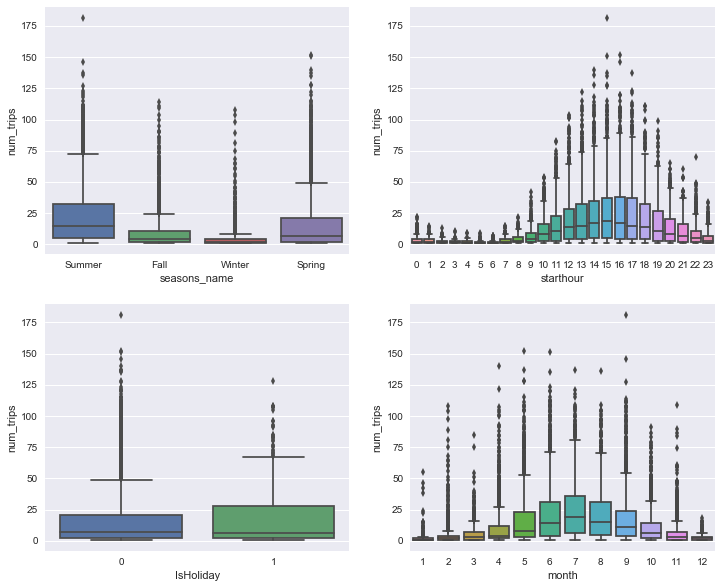

In [28]:
#at from_station_id=35
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=resultData, y="num_trips", x="seasons_name",orient="v",ax=axes[0][0])
sns.boxplot(data=resultData, y="num_trips", x="starthour",orient="v",ax=axes[0][1])
sns.boxplot(data=resultData, y="num_trips", x="IsHoliday", orient="v",ax=axes[1][0])
sns.boxplot(data=resultData, y="num_trips", x="month",orient="v",ax=axes[1][1])

In [36]:
#Categorize variables
categoricalVariables = ["from_station_id","from_station_name","month", "year", "season", "seasons_name", "IsHoliday",
                       "weather", "weatherCode", "day_name", "day", "starthour"]
for var in categoricalVariables:
    resultData[var] = resultData[var].astype("category")

resultData.dtypes


startday                  datetime64[ns]
starthour                       category
from_station_id                 category
num_trips                          int64
from_station_name               category
from_station_latitude            float64
from_station_longitude           float64
day                             category
month                           category
year                            category
day_name                        category
tripdate                           int32
season                          category
seasons_name                    category
IsHoliday                       category
weather                         category
humidity                         float64
temperature                      float64
weatherCode                     category
dtype: object

In [31]:
#Outlier are present, will check with model, how model is better without outliers
resultDataWithoutOutliers = resultData[np.abs(resultData["num_trips"]-resultData["num_trips"].mean())<=(3*resultData["num_trips"].std())]

print("Before Ouliers removal: ",resultData.shape)
print("After Ouliers removal: ",resultDataWithoutOutliers.shape)


Before Ouliers removal:  (18224, 18)
After Ouliers removal:  (17851, 18)


In [41]:
#Correlation Analysis

#X = resultData.drop(['startday','from_station_longitude', 'from_station_name', 'from_station_id', 'seasons_name', 
                     #'from_station_latitude', 'weather', 'day_name', 'weatherCode'], axis=1)



X = resultData[['num_trips', 'humidity', 'temperature']]

X.head()
X.corr()

,num_trips,humidity,temperature
num_trips,1.000000,-0.369624,0.490936
humidity,-0.369624,1.000000,-0.115452
temperature,0.490936,-0.115452,1.000000


In [ ]:
#Visulization of data for season, holidays, weekday

